In [64]:
filePath1 = r'마포구.csv'
filePath2 = r'노원구.csv'
filePath3 = r'강남구.csv'

targetCols = ['입찰공고번호', '공고명', '공사현장', '실수요기관명', '수요기관지역명',
             '참가수', '개찰순위', '입찰업체명', '입찰업체기업구분명', '입찰률',
              '낙찰여부', '낙찰자결정적용법규', '참조번호', '공공조달분류명', '입찰금액']

df1 = pd.read_csv(filePath1)
df2 = pd.read_csv(filePath2)
df3 = pd.read_csv(filePath3)

df = pd.concat([df1, df2])
df = pd.concat([df, df3])
df = df[targetCols]

missingInfo = [(key, val) for key, val in df.isnull().sum().items() if val != 0]
print("결측값 정보는 다음과 같습니다.", missingInfo)

inf         = 999
df_complete = df.fillna({'개찰순위': inf})
df_complete = df_complete.dropna()
print("결측값 제거 전 데이터 수 %d, 제거 후 데이터 수 %d." %(len(df), len(df_complete)))

/Users/dragoninsydneyhanyong/PyProjects/env2/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


결측값 정보는 다음과 같습니다. [('개찰순위', 33634), ('입찰률', 22), ('낙찰자결정적용법규', 448), ('입찰금액', 22)]
결측값 제거 전 데이터 수 63466, 제거 후 데이터 수 62996.


(array([4.0327e+04, 1.3645e+04, 3.9000e+03, 1.1690e+03, 3.2400e+02,
        7.5100e+02, 9.7200e+02, 6.9800e+02, 1.0000e+00, 4.7900e+02,
        1.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.5700e+02, 1.2000e+01, 1.1900e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.5000e+01, 4.0800e+02, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

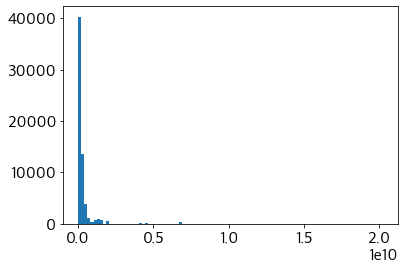

In [74]:
plt.hist(df_complete['입찰금액'], bins=100)

In [23]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc

# rc('font', family='AppleGothic')
rc('font', family='Apple SD Gothic Neo')

plt.rcParams['axes.unicode_minus'] = False

smallSize  = 10
mediumSize = 13
largeSize  = 16
plt.rc('font', size=largeSize)

# 자료 기초통계 확인

In [12]:
filePath1 = r'마포구.csv'
filePath2 = r'노원구.csv'
filePath3 = r'강남구.csv'

targetCols = ['입찰공고번호', '공고명', '공사현장', '실수요기관명', '수요기관지역명',
             '참가수', '개찰순위', '입찰업체명', '입찰업체기업구분명', '입찰률',
              '낙찰여부', '낙찰자결정적용법규', '참조번호', '공공조달분류명']

df1 = pd.read_csv(filePath1)
df2 = pd.read_csv(filePath2)
df3 = pd.read_csv(filePath3)

df = pd.concat([df1, df2])
df = pd.concat([df, df3])
df = df[targetCols]

missingInfo = [(key, val) for key, val in df.isnull().sum().items() if val != 0]
print("결측값 정보는 다음과 같습니다.", missingInfo)

inf         = 999
df_complete = df.fillna({'개찰순위': inf})
df_complete = df_complete.dropna()
print("결측값 제거 전 데이터 수 %d, 제거 후 데이터 수 %d." %(len(df), len(df_complete)))

novelCps = [cp for cp in df_complete['입찰업체명'].value_counts().keys() \
            if df_complete['입찰업체명'].value_counts()[cp] < 2]

print("\n전체 참여한 회사 수는 %d입니다." %len(df_complete['입찰업체명'].value_counts().keys()))
print("입찰에 처음 참여한 회사 수는 %d입니다." %len(novelCps))
print("낙찰 비율은 평균 %f입니다." %(df_complete['낙찰여부'].value_counts()['Y']/len(df_complete)))

/Users/dragoninsydneyhanyong/PyProjects/env2/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


결측값 정보는 다음과 같습니다. [('개찰순위', 33634), ('입찰률', 22), ('낙찰자결정적용법규', 448)]
결측값 제거 전 데이터 수 63466, 제거 후 데이터 수 62996.

전체 참여한 회사 수는 8174입니다.
입찰에 처음 참여한 회사 수는 2067입니다.
낙찰 비율은 평균 0.001397입니다.


<BarContainer object of 16 artists>

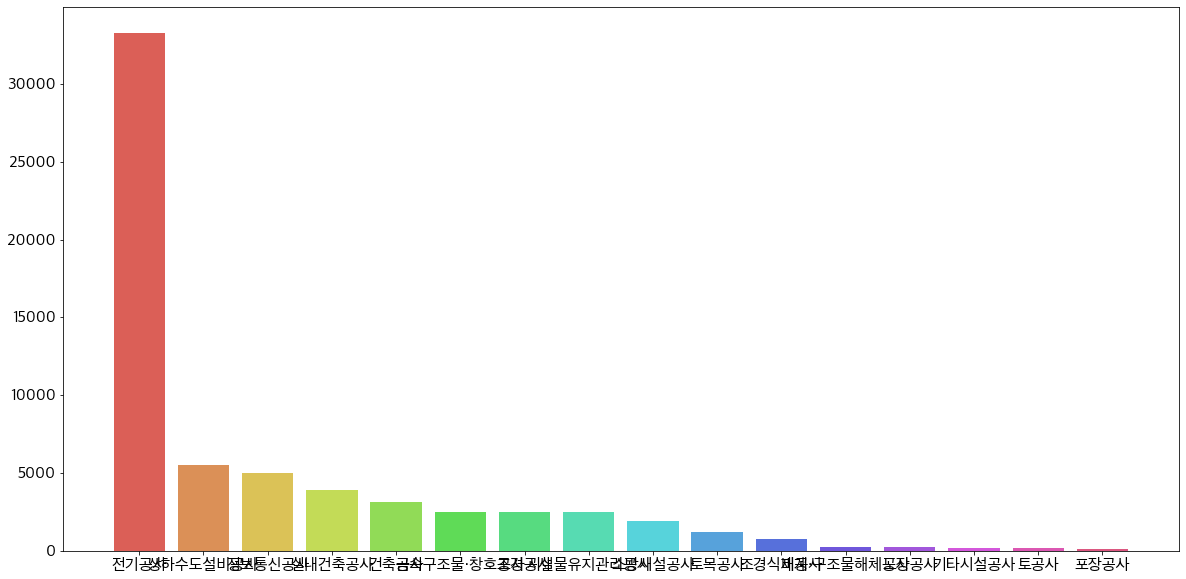

In [13]:
targetCol = '공공조달분류명'
# targetCol = '입찰업체기업구분명'
# targetCol = '공사현장'
# targetCol = '낙찰자결정적용법규'

plt.figure(figsize=(20, 10))
colors = sns.color_palette('hls', len(df_complete[targetCol].value_counts().keys()))
plt.bar(df_complete[targetCol].value_counts().keys(),
        df_complete[targetCol].value_counts().values,
        color=colors)

# 이상 구조 검출

In [14]:
G = nx.Graph()

G.add_nodes_from(list(df_complete['수요기관지역명'].value_counts().keys()),
                 color='red')
G.add_nodes_from(list(df_complete['입찰업체명'].value_counts().keys()),
                 color='dimgrey')
G.add_nodes_from(list(df_complete['공공조달분류명'].value_counts().keys()),
                 color='cyan')

edges_list1, edges_list2 = [], []
edges_dict1, edges_dict2 = {}, {}

df_G = df_complete.loc[df_complete['낙찰여부']=='Y']

for i in range(len(df_G)):
    G.add_edge(df_G.iloc[i]['수요기관지역명'], df_G.iloc[i]['공공조달분류명'])
    edge1 = (df_G.iloc[i]['수요기관지역명'], df_G.iloc[i]['입찰업체명'])
    edge2 = (df_G.iloc[i]['공공조달분류명'], df_G.iloc[i]['입찰업체명'])
    
    if edge1 not in edges_list1:
        edges_list1.append(edge1)
        edges_dict1[edge1] = 1
        G.add_edge(edge1[0], edge1[1], weight=1)
    else:
        edges_dict1[edge1] += 1
        G.add_edge(edge1[0], edge1[1], weight=edges_dict1[edge1])
    
    if edge2 not in edges_list2:
        edges_list2.append(edge2)
        edges_dict2[edge2] = 1
        G.add_edge(edge2[0], edge2[1], weight=1)
    else:
        edges_dict2[edge2] += 1
        G.add_edge(edge2[0], edge2[1], weight=edges_dict2[edge2])

print("선을 모두 이었습니다.")

cp_nodes   = [node[0] for node in G.nodes(data="color") if node[1]=='dimgrey']
cpDeg_list = list(G.degree(cp_nodes))
cpDeg_list.sort(key=lambda x:-x[1])

remove_nodes = [node[0] for node in cpDeg_list if node[1]==0]
G.remove_nodes_from(remove_nodes)
print("연결없는 회사들을 제거하였습니다.")

선을 모두 이었습니다.
연결없는 회사들을 제거하였습니다.


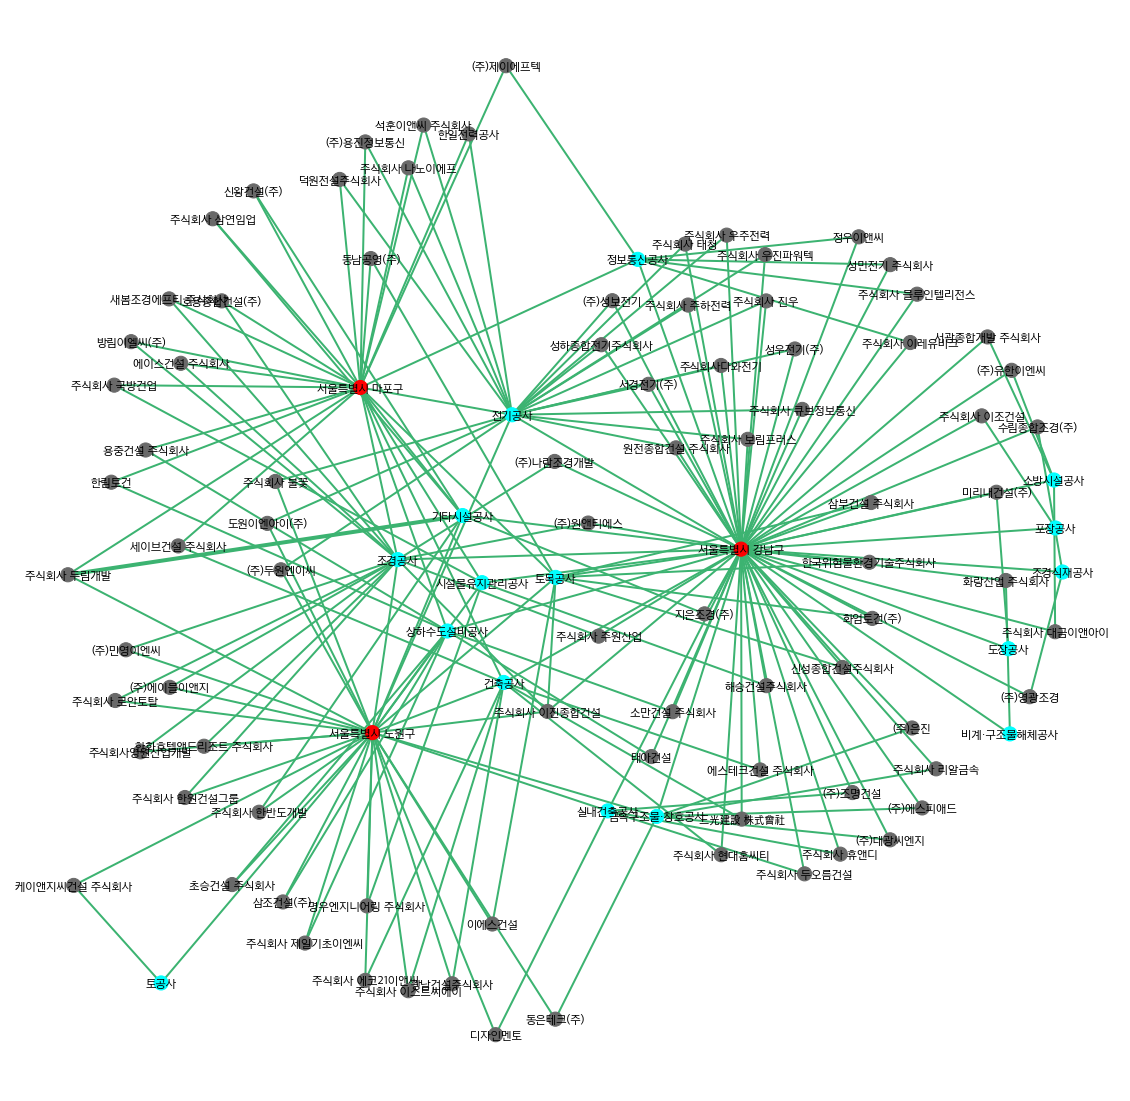

In [15]:
plt.figure(figsize=(20,20))
plt.margins(x=0.01, y=0.01)

# pos = nx.circular_layout(G)
pos = nx.kamada_kawai_layout(G)
# pos = nx.random_layout(G)

nx.draw_networkx_nodes(
        G, pos, node_color=[node[1] for node in G.nodes(data="color")], node_size=200)

nx.draw_networkx_edges(
        G, pos, edge_color='mediumseagreen',
        width=list(np.array([edge[2] for edge in G.edges(data="weight", default=1)])*2))

nx.draw_networkx_labels(
        G, pos, font_family='Apple SD Gothic Neo', font_color='black', font_size=12, font_weight='bold')

plt.axis('off')
plt.show()

In [16]:
nodes1s = [node[0] for node in G.nodes(data="color") if node[1]=='red']
nodes2s = [node[0] for node in G.nodes(data="color") if node[1]=='dimgrey']
nodes1s = random.sample(nodes1s, 1)
# nodes2s = random.sample(nodes2s, 48)

nodePairs = []
for node1 in nodes1s:
    for node2 in nodes2s:
        nodePairs.append((node1, node2))

# preds = nx.jaccard_coefficient(G, nodePairs)
# preds = nx.common_neighbor_centrality(G, nodePairs)
preds = nx.resource_allocation_index(G, nodePairs)
for u, v, p in preds:
    print(f"({u}, {v}) -> {p}")

(서울특별시 노원구, 원전종합건설 주식회사) -> 0.041666666666666664
(서울특별시 노원구, 호용종합건설(주)) -> 0.058823529411764705
(서울특별시 노원구, 주식회사 주원산업) -> 0.058823529411764705
(서울특별시 노원구, 주식회사 한원건설그룹) -> 0.058823529411764705
(서울특별시 노원구, 세이브건설 주식회사) -> 0.1
(서울특별시 노원구, 화엄토건(주)) -> 0.1
(서울특별시 노원구, 신성종합건설주식회사) -> 0.1
(서울특별시 노원구, 서경전기(주)) -> 0.041666666666666664
(서울특별시 노원구, 성민전기 주식회사) -> 0
(서울특별시 노원구, 주식회사 대금이앤아이) -> 0
(서울특별시 노원구, 서광종합개발 주식회사) -> 0
(서울특별시 노원구, 주식회사 보림프러스) -> 0.041666666666666664
(서울특별시 노원구, 에이스건설 주식회사) -> 0.058823529411764705
(서울특별시 노원구, 주식회사 큐브정보통신) -> 0.041666666666666664
(서울특별시 노원구, 주식회사 우진파워텍) -> 0.041666666666666664
(서울특별시 노원구, 정우이앤씨) -> 0
(서울특별시 노원구, (주)용진정보통신) -> 0.041666666666666664
(서울특별시 노원구, (주)유한이엔씨) -> 0
(서울특별시 노원구, 주식회사 나노이에프) -> 0.041666666666666664
(서울특별시 노원구, 주식회사 불꽃) -> 0.041666666666666664
(서울특별시 노원구, 성우전기(주)) -> 0.041666666666666664
(서울특별시 노원구, 도원이엔아이(주)) -> 0.041666666666666664
(서울특별시 노원구, 주식회사 진우) -> 0.041666666666666664
(서울특별시 노원구, 주식회사다와전기) -> 0.041666666666666664
(서울특별시 노원구, 덕원전설주식

# 입찰여부 예측

In [17]:
G = nx.Graph()

G.add_nodes_from(list(df_complete['수요기관지역명'].value_counts().keys()),
                 color='red')
G.add_nodes_from(list(df_complete['입찰업체명'].value_counts().keys()),
                 color='dimgrey')
G.add_nodes_from(list(df_complete['공공조달분류명'].value_counts().keys()),
                 color='cyan')

edges_list1, edges_list2 = [], []
edges_dict1, edges_dict2 = {}, {}

for i in range(len(df_complete)):
    if df_complete.iloc[i]['낙찰여부']=='Y':
        G.add_edge(df_complete.iloc[i]['수요기관지역명'], df_complete.iloc[i]['공공조달분류명'])
        edge1 = (df_complete.iloc[i]['수요기관지역명'], df_complete.iloc[i]['입찰업체명'])
        edge2 = (df_complete.iloc[i]['공공조달분류명'], df_complete.iloc[i]['입찰업체명'])
        edge3 = (df_complete.iloc[i]['입찰업체명'], df_complete.iloc[i+1]['입찰업체명'])
        edge4 = (df_complete.iloc[i]['입찰업체명'], df_complete.iloc[i+2]['입찰업체명'])
        G.add_edge(edge3[0], edge3[1], weight=1)
        G.add_edge(edge4[0], edge4[1], weight=1)
        
        if edge1 not in edges_list1:
            edges_list1.append(edge1)
            edges_dict1[edge1] = 1
            G.add_edge(edge1[0], edge1[1], weight=1)
        else:
            edges_dict1[edge1] += 1
            G.add_edge(edge1[0], edge1[1], weight=edges_dict1[edge1])

        if edge2 not in edges_list2:
            edges_list2.append(edge2)
            edges_dict2[edge2] = 1
            G.add_edge(edge2[0], edge2[1], weight=1)
        else:
            edges_dict2[edge2] += 1
            G.add_edge(edge2[0], edge2[1], weight=edges_dict2[edge2])

print("선을 모두 이었습니다.")

cp_nodes   = [node[0] for node in G.nodes(data="color") if node[1]=='dimgrey']
cpDeg_list = list(G.degree(cp_nodes))
cpDeg_list.sort(key=lambda x:-x[1])

remove_nodes = [node[0] for node in cpDeg_list if node[1]==0]
G.remove_nodes_from(remove_nodes)
print("연결없는 회사들을 제거하였습니다.")

선을 모두 이었습니다.
연결없는 회사들을 제거하였습니다.


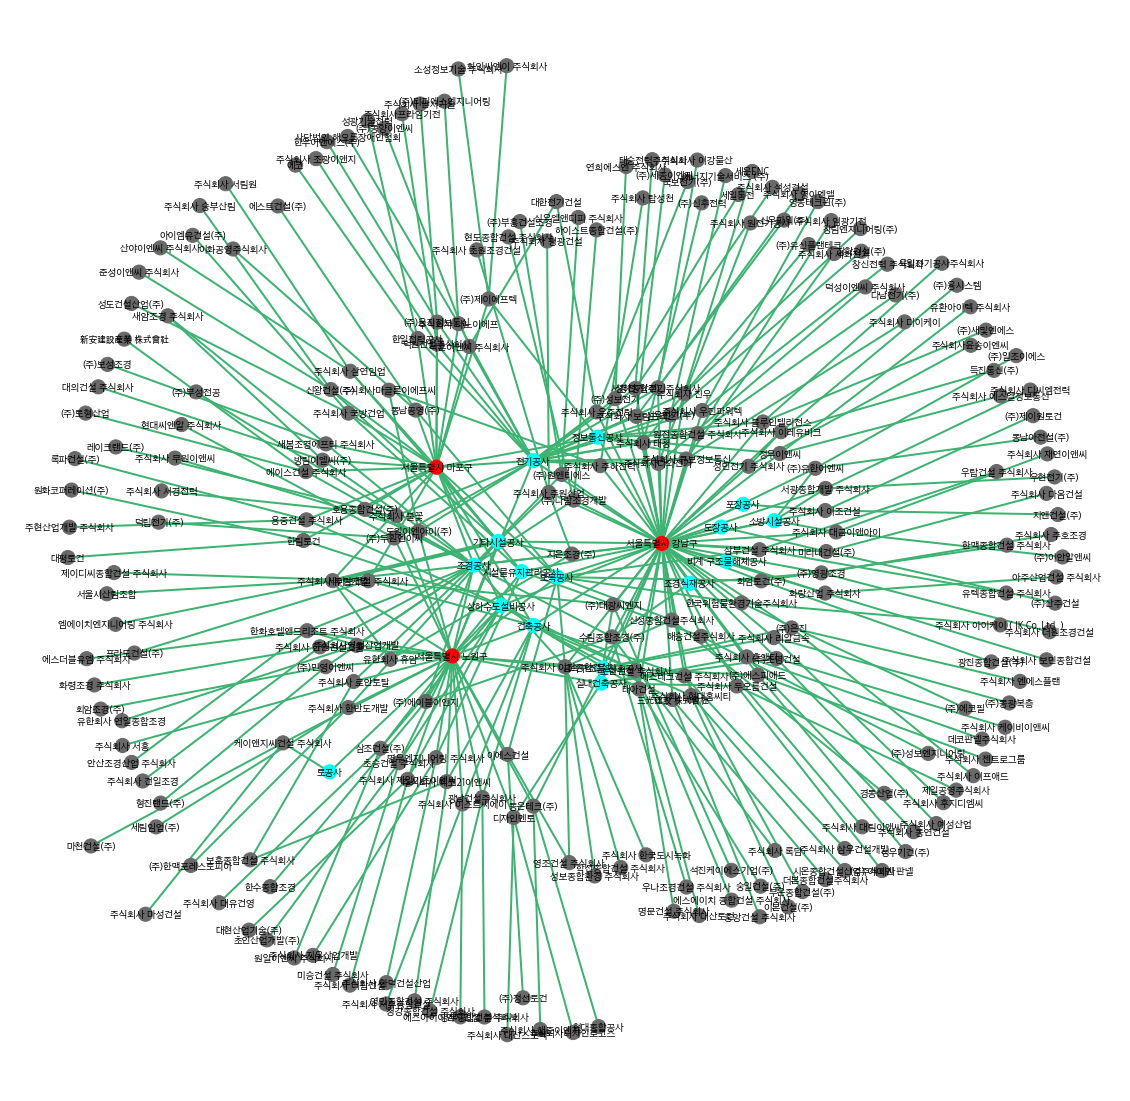

In [18]:
plt.figure(figsize=(20,20))
plt.margins(x=0.01, y=0.01)

# pos = nx.circular_layout(G)
pos = nx.kamada_kawai_layout(G)
# pos = nx.random_layout(G)

nx.draw_networkx_nodes(
        G, pos, node_color=[node[1] for node in G.nodes(data="color")], node_size=200)

nx.draw_networkx_edges(
        G, pos, edge_color='mediumseagreen',
        width=list(np.array([edge[2] for edge in G.edges(data="weight", default=1)])*2))

nx.draw_networkx_labels(
        G, pos, font_family='Apple SD Gothic Neo', font_color='black', font_size=10, font_weight='bold')

plt.axis('off')
plt.show()

In [51]:
nodes1s = [node[0] for node in G.nodes(data="color") if node[1]=='red']
nodes2s = [node[0] for node in G.nodes(data="color") if node[1]=='dimgrey']
# nodes1s = random.sample(nodes1s, 1)
# nodes2s = random.sample(nodes2s, 50)
nodes1s = ['서울특별시 노원구']

nodePairs = []
for node1 in nodes1s:
    for node2 in nodes2s:
        nodePairs.append((node1, node2))

preds = nx.jaccard_coefficient(G, nodePairs)
# preds = nx.common_neighbor_centrality(G, nodePairs)
# preds = nx.resource_allocation_index(G, nodePairs)

nodes    = []
edgeVals = []
for u, v, p in preds:
    nodes.append((u,v))
    edgeVals.append(p)

edgeVals = np.array(edgeVals)
scaler   = MinMaxScaler()
edgeVals = list(scaler.fit_transform(np.reshape(edgeVals,(-1,1))).flatten())

for idx, prob in enumerate(edgeVals):
    print(nodes[idx], "->", prob)

('서울특별시 노원구', '보훈종합건설 주식회사') -> 1.0
('서울특별시 노원구', '원전종합건설 주식회사') -> 0.4583333333333333
('서울특별시 노원구', '新安建設産業 株式會社') -> 0.0
('서울특별시 노원구', '호용종합건설(주)') -> 0.4583333333333333
('서울특별시 노원구', '주식회사 주원산업') -> 0.44594594594594594
('서울특별시 노원구', '장학건설(주)') -> 0.0
('서울특별시 노원구', '주식회사 한원건설그룹') -> 0.4583333333333333
('서울특별시 노원구', '대의건설 주식회사') -> 0.0
('서울특별시 노원구', '세이브건설 주식회사') -> 0.44594594594594594
('서울특별시 노원구', '화엄토건(주)') -> 0.4583333333333333
('서울특별시 노원구', '대현산업기술(주)') -> 0.5
('서울특별시 노원구', '주식회사 다옴건설') -> 0.0
('서울특별시 노원구', '다남전기(주)') -> 0.0
('서울특별시 노원구', '우현전기(주)') -> 0.0
('서울특별시 노원구', '신성종합건설주식회사') -> 0.9428571428571428
('서울특별시 노원구', '(주)성보엔지니어링') -> 0.0
('서울특별시 노원구', '서경전기(주)') -> 0.4583333333333333
('서울특별시 노원구', '에스트건설(주)') -> 0.0
('서울특별시 노원구', '성민전기 주식회사') -> 0.0
('서울특별시 노원구', '주식회사 대금이앤아이') -> 0.0
('서울특별시 노원구', '서광종합개발 주식회사') -> 0.0
('서울특별시 노원구', '사단법인 해오름장애인협회') -> 0.0
('서울특별시 노원구', '주식회사 보림프러스') -> 0.4583333333333333
('서울특별시 노원구', '현도종합건설 주식회사') -> 0.0
('서울특별시 노원구', '에이스건설 주식회사') -> 0.458